In [1]:
#import variables and read cvs
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = "data_base_clean.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed',
       'neighbourhood', 'zipcode', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'bed_type', 'amenities', 'review_scores_rating'],
      dtype='object')

In [2]:
reduced_df = df[["neighbourhood_cleansed", "neighbourhood", "latitude", "longitude",
                 "room_type", "number_of_reviews", "review_scores_rating"]]
reduced_df.head()

,neighbourhood_cleansed,neighbourhood,latitude,longitude,room_type,number_of_reviews,review_scores_rating
0,Cuauhtemoc,San Rafael,19.44076,-99.16324,Private room,10,87.0
1,Cuauhtemoc,Condesa,19.41006,-99.17645,Private room,39,89.0
2,Cuauhtemoc,Roma Norte,19.42292,-99.15775,Entire home/apt,37,100.0
3,Cuauhtemoc,Condesa,19.41259,-99.17959,Private room,51,98.0
4,Cuauhtemoc,Hipodromo,19.41375,-99.17028,Entire home/apt,39,98.0


In [3]:
reduced_df.describe()

,latitude,longitude,number_of_reviews,review_scores_rating
count,10696.000000,10696.000000,10696.000000,10696.000000
mean,19.409178,-99.167835,29.479712,95.270475
std,0.027382,0.016838,40.233175,8.078429
min,19.334160,-99.219340,1.000000,20.000000
25%,19.395962,-99.177360,4.000000,94.000000
50%,19.414680,-99.168490,13.000000,97.000000
75%,19.429960,-99.157308,39.000000,100.000000
max,19.473550,-99.115820,473.000000,100.000000


In [5]:
total_anuncios = reduced_df["number_of_reviews"].count()
total_reviews = reduced_df["number_of_reviews"].sum()

table_resume = pd.DataFrame({"Total Announcements":[total_anuncios],
                             "Total Reviews":[total_reviews]})
table_resume["Total Announcements"] = table_resume["Total Announcements"].astype(float).map("{:,.0f}".format)
table_resume["Total Reviews"] = table_resume["Total Reviews"].astype(float).map("{:,.0f}".format)
table_resume

,Total Announcements,Total Reviews
0,"10,696","315,315"


In [6]:
total_count_entire = reduced_df[reduced_df["room_type"]=="Entire home/apt"].count()["number_of_reviews"]
total_count_private = reduced_df[reduced_df["room_type"]=="Private room"].count()["number_of_reviews"]
total_sum_entire = reduced_df[reduced_df["room_type"]=="Entire home/apt"].sum()["number_of_reviews"]
total_sum_private = reduced_df[reduced_df["room_type"]=="Private room"].sum()["number_of_reviews"]

table_resume_types = pd.DataFrame({"Total Entire Rooms Announcements":[total_count_entire],
                                   "Total Private Rooms Announcements" : [total_count_private],
                                   "Total Entire Rooms Reviews": [total_sum_entire],
                                   "Total Private Rooms Reviews":[total_sum_private]
                                  })

table_resume_types["Total Entire Rooms Announcements"] = table_resume_types["Total Entire Rooms Announcements"].astype(float).map("{:,.0f}".format)
table_resume_types["Total Private Rooms Announcements"] = table_resume_types["Total Private Rooms Announcements"].astype(float).map("{:,.0f}".format)
table_resume_types["Total Entire Rooms Reviews"] = table_resume_types["Total Entire Rooms Reviews"].astype(float).map("{:,.0f}".format)
table_resume_types["Total Private Rooms Reviews"] = table_resume_types["Total Private Rooms Reviews"].astype(float).map("{:,.0f}".format)
table_resume_types

,Total Entire Rooms Announcements,Total Private Rooms Announcements,Total Entire Rooms Reviews,Total Private Rooms Reviews
0,"6,153","4,419","219,891","94,004"


<IPython.core.display.Javascript object>


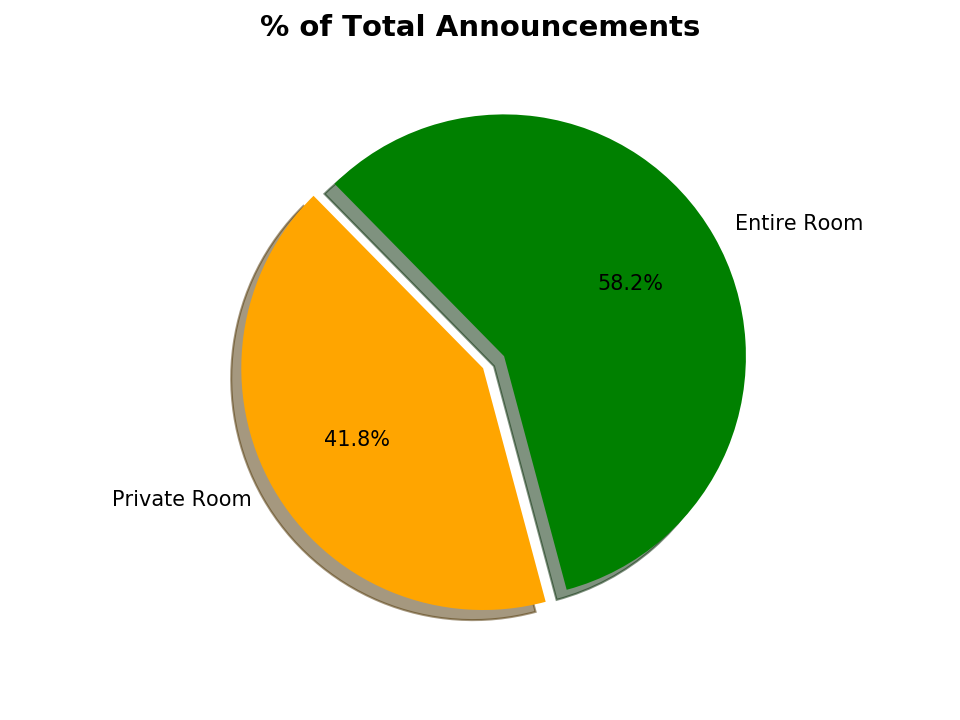

In [7]:
anuncios = [total_count_entire,total_count_private]

labels = ["Entire Room", "Private Room"]
colors = ["green", "orange"]

plt.pie(anuncios,explode=(0.1,0),colors=colors,startangle=285,labels=labels,autopct="%1.1f%%",shadow=True)
plt.suptitle("% of Total Announcements", fontsize=14, fontweight='bold')
plt.axis("equal")
plt.savefig("Pie_Anuncios.png")

<IPython.core.display.Javascript object>


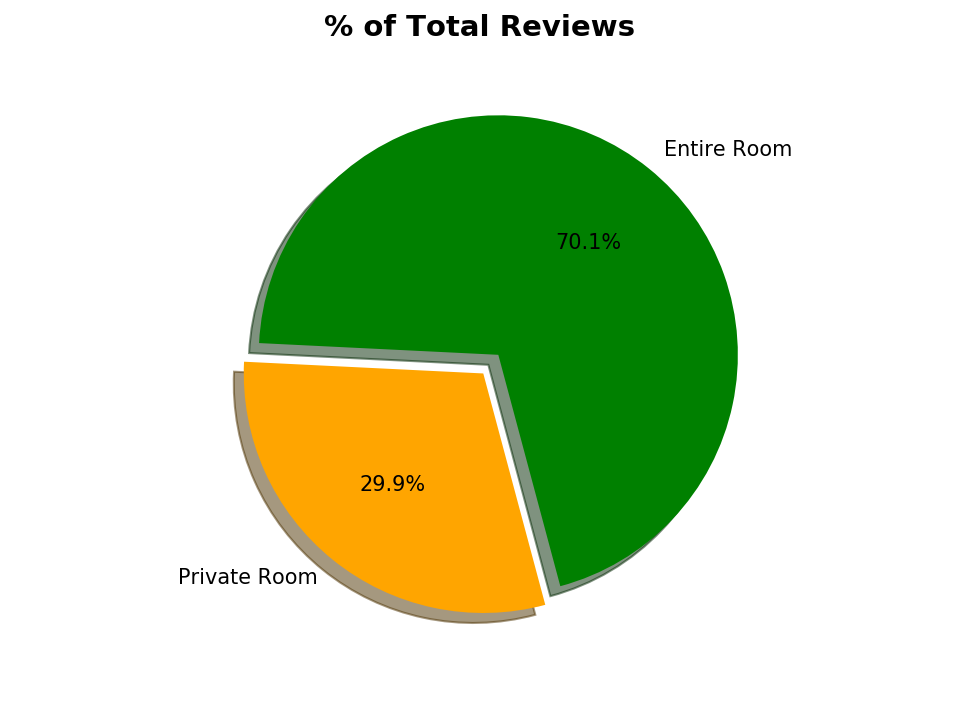

In [8]:
resenas = [total_sum_entire,total_sum_private]

labels01 = ["Entire Room", "Private Room"]
colors01 = ["green", "orange"]

plt.pie(resenas,explode=(0.1,0),colors=colors,startangle=285,labels=labels,autopct="%1.1f%%",shadow=True)
plt.suptitle("% of Total Reviews", fontsize=14, fontweight='bold')
plt.axis("equal")
plt.savefig("Pie_Resenas.png")

In [9]:
table_df_02 = reduced_df.groupby(["neighbourhood_cleansed"])
reviews_count = table_df_02["number_of_reviews"].count()
reviews_sum = table_df_02["number_of_reviews"].sum()
scores_average = table_df_02["review_scores_rating"].mean()
scores_max = table_df_02["review_scores_rating"].max()
scores_min = table_df_02["review_scores_rating"].min()

reviews_neighborhood_df = pd.DataFrame({"Total Announcements":reviews_count,
                               "Total Reviews":reviews_sum,
                                "Average Score": scores_average,
                                })
reviews_neighborhood_df["Total Announcements"] = reviews_neighborhood_df["Total Announcements"].astype(float)#.map("{:,.0f}".format)
reviews_neighborhood_df["Total Reviews"] = reviews_neighborhood_df["Total Reviews"].astype(float)#.map("{:,.0f}".format)
reviews_neighborhood_df["Average Score"] = reviews_neighborhood_df["Average Score"].astype(float)#.map("{:,.2f}".format)
reviews_neighborhood_df

,Total Announcements,Total Reviews,Average Score
neighbourhood_cleansed,,,
Alvaro Obregon,264.0,4082.0,96.041667
Azcapotzalco,27.0,437.0,97.370370
Benito Juarez,2009.0,41082.0,95.205575
Coyoacan,748.0,17395.0,95.994652
Cuauhtemoc,5680.0,201402.0,95.167606
Gustavo A. Madero,12.0,149.0,97.333333
Iztacalco,32.0,655.0,95.125000
Iztapalapa,15.0,237.0,97.400000
Miguel Hidalgo,1885.0,49331.0,95.196817


<IPython.core.display.Javascript object>


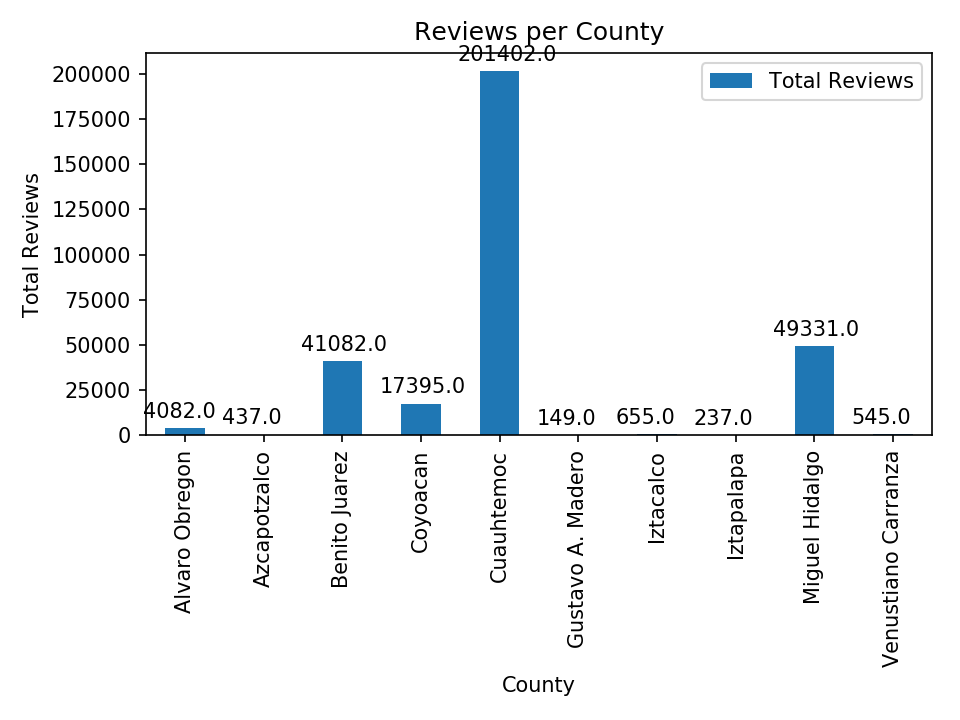

C:\Users\lanaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [37]:
#reviews_neighborhood_df.plot(kind='bar',x="neighbourhood_cleansed",y="Total Announcements")

tabla_grafica = reviews_neighborhood_df[["Total Reviews"]]

ax = tabla_grafica[["Total Reviews"]].plot(kind="bar",title="Reviews per County",legend=True)
ax.set_xlabel("County")
ax.set_ylabel("Total Reviews")

for idx, label in enumerate(list(tabla_grafica.index)): 
        for acc in tabla_grafica.columns:
            value = np.round(tabla_grafica.ix[idx][acc],decimals=0)
            ax.annotate(value,
                        (idx, value),
                         xytext=(-20, 5), 
                         textcoords='offset points')

plt.show()
plt.tight_layout()

In [38]:
entire_room = reduced_df.loc[reduced_df["room_type"]=="Entire home/apt",["number_of_reviews", "neighbourhood_cleansed", "room_type"]]
table_df_03 = entire_room.groupby(["neighbourhood_cleansed"])
entire_count = table_df_03["number_of_reviews"].count()

private_room = reduced_df.loc[reduced_df["room_type"]=="Private room",["number_of_reviews", "neighbourhood_cleansed", "room_type"]]
table_df_04 = private_room.groupby(["neighbourhood_cleansed"])
private_count = table_df_04["number_of_reviews"].count()

table_counts01 = pd.merge(entire_count, private_count, on="neighbourhood_cleansed")
table_counts01 = table_counts01.rename(columns={"neighbourhood_cleansed":"Neighbourhood", 
                                                "number_of_reviews_x":"Entire home/apt", 
                                                "number_of_reviews_y":"Private room",
                                             })
table_counts01["Entire home/apt"] = table_counts01["Entire home/apt"].astype(float).map("{:,.0f}".format)
table_counts01["Private room"] = table_counts01["Private room"].astype(float).map("{:,.0f}".format)
table_counts01

,Entire home/apt,Private room
neighbourhood_cleansed,,
Alvaro Obregon,107,155
Azcapotzalco,14,12
Benito Juarez,928,"1,060"
Coyoacan,308,431
Cuauhtemoc,"3,538","2,067"
Gustavo A. Madero,5,7
Iztacalco,22,10
Iztapalapa,6,9
Miguel Hidalgo,"1,212",658


In [39]:
entire_room_sum = reduced_df.loc[reduced_df["room_type"]=="Entire home/apt",["number_of_reviews", "neighbourhood_cleansed", "room_type"]]
table_df_10 = entire_room_sum.groupby(["neighbourhood_cleansed"])
entire_sum = table_df_10["number_of_reviews"].sum()

private_room_sum = reduced_df.loc[reduced_df["room_type"]=="Private room",["number_of_reviews", "neighbourhood_cleansed", "room_type"]]
table_df_11 = private_room_sum.groupby(["neighbourhood_cleansed"])
private_sum = table_df_11["number_of_reviews"].sum()

table_sum01 = pd.merge(entire_sum, private_sum, on="neighbourhood_cleansed")
table_sum01 = table_sum01.rename(columns={"neighbourhood_cleansed":"Neighbourhood", 
                                                "number_of_reviews_x":"Entire home/apt", 
                                                "number_of_reviews_y":"Private room",
                                             })
table_sum01["Entire home/apt"] = table_sum01["Entire home/apt"].astype(float).map("{:,.0f}".format)
table_sum01["Private room"] = table_sum01["Private room"].astype(float).map("{:,.0f}".format)
table_sum01

,Entire home/apt,Private room
neighbourhood_cleansed,,
Alvaro Obregon,"2,095","1,975"
Azcapotzalco,347,88
Benito Juarez,"24,744","15,883"
Coyoacan,"9,306","7,891"
Cuauhtemoc,"146,569","54,269"
Gustavo A. Madero,100,49
Iztacalco,557,98
Iztapalapa,112,125
Miguel Hidalgo,"35,690","13,453"


In [90]:
listado = pd.read_csv("Table01.csv")
listado[listado.index.duplicated()]

delegaciones = reduced_df.groupby("neighbourhood")
avgscore = delegaciones.mean()["review_scores_rating"]
reviewcount = delegaciones["number_of_reviews"].count()
anoncount = delegaciones["neighbourhood"].count()
coloniatype = listado.set_index("neighbourhood")["neighbourhood_cleansed"]

del_table_df = pd.DataFrame({
    "Number of Reviews": reviewcount,
    "Average Score": avgscore,
    "Total of Announcements": anoncount,
    "County Type": coloniatype,
})

Alv_Ob = del_table_df[del_table_df['County Type']=="Alvaro Obregon"]
Azca = del_table_df[del_table_df['County Type']=="Azcapotzalco"]
Benito = del_table_df[del_table_df['County Type']=="Benito Juarez"]
Coyo = del_table_df[del_table_df['County Type']=="Coyoacann"]
Cuauh = del_table_df[del_table_df['County Type']=="Cuauhtemoc"]
Gustavo = del_table_df[del_table_df['County Type']=="Gustavo A. Madero"]
Iztaca = del_table_df[del_table_df['County Type']=="Iztacalco"]
Iztapa = del_table_df[del_table_df['County Type']=="Iztapalapa"]
Miguel = del_table_df[del_table_df['County Type']=="Miguel Hidalgo"]
Venus = del_table_df[del_table_df['County Type']=="Venustiano Carranza"]

<IPython.core.display.Javascript object>


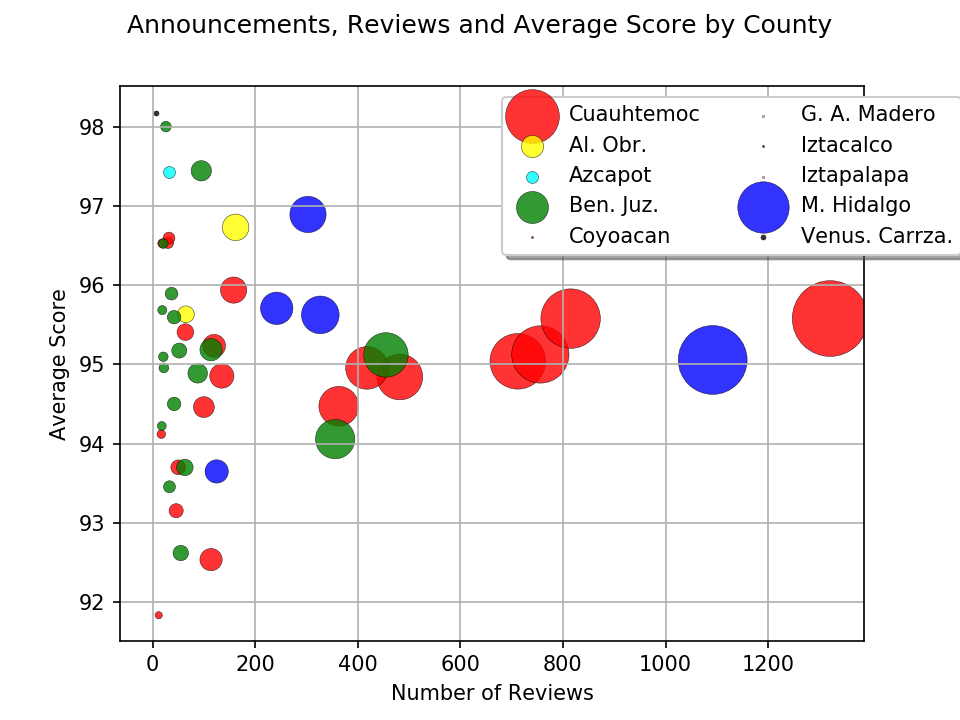

In [117]:
del01_count = Cuauh["Number of Reviews"]
del01_avg = Cuauh["Average Score"]
del01_counting = Cuauh["Total of Announcements"]

del02_count = Alv_Ob["Number of Reviews"]
del02_avg = Alv_Ob["Average Score"]
del02_counting = Alv_Ob["Total of Announcements"]

del03_count = Azca["Number of Reviews"]
del03_avg = Azca["Average Score"]
del03_counting = Azca["Total of Announcements"]

del04_count = Benito["Number of Reviews"]
del04_avg = Benito["Average Score"]
del04_counting = Benito["Total of Announcements"]

del05_count = Coyo["Number of Reviews"]
del05_avg = Coyo["Average Score"]
del05_counting = Coyo["Total of Announcements"]

del06_count = Gustavo["Number of Reviews"]
del06_avg = Gustavo["Average Score"]
del06_counting = Gustavo["Total of Announcements"]

del07_count = Iztaca["Number of Reviews"]
del07_avg = Iztaca["Average Score"]
del07_counting = Iztaca["Total of Announcements"]

del08_count = Iztapa["Number of Reviews"]
del08_avg = Iztapa["Average Score"]
del08_counting = Iztapa["Total of Announcements"]

del09_count = Miguel["Number of Reviews"]
del09_avg = Miguel["Average Score"]
del09_counting = Miguel["Total of Announcements"]

del10_count = Venus["Number of Reviews"]
del10_avg = Venus["Average Score"]
del10_counting = Venus["Total of Announcements"]

plt.scatter(del01_count, del01_avg, s=del01_counting, color="red",
            edgecolor="black", label="Cuauhtemoc",alpha=.8, linewidths=.25)

plt.scatter(del02_count, del02_avg, s=del02_counting, color="yellow",
            edgecolor="black", label="Al. Obr.",alpha=.8, linewidths=.25)

plt.scatter(del03_count, del03_avg, s=del03_counting, color="cyan",
            edgecolor="black", label="Azcapot",alpha=.8, linewidths=.25)

plt.scatter(del04_count, del04_avg, s=del04_counting, color="green",
            edgecolor="black", label="Ben. Juz.",alpha=.8, linewidths=.25)

plt.scatter(del05_count, del05_avg, s=del05_counting, color="m",
            edgecolor="black", label="Coyoacan",alpha=.8, linewidths=.25)

plt.scatter(del06_count, del06_avg, s=del06_counting, color="lavender",
            edgecolor="black", label="G. A. Madero",alpha=.8, linewidths=.25)

plt.scatter(del07_count, del07_avg, s=del07_counting, color="navy",
            edgecolor="black", label="Iztacalco",alpha=.8, linewidths=.25)

plt.scatter(del08_count, del08_avg, s=del08_counting, color="pink",
            edgecolor="black", label="Iztapalapa",alpha=.8, linewidths=.25)

plt.scatter(del09_count, del09_avg, s=del09_counting, color="blue",
            edgecolor="black", label="M. Hidalgo",alpha=.8, linewidths=.25)

plt.scatter(del10_count, del10_avg, s=del10_counting, color="black",
            edgecolor="black", label="Venus. Carrza.",alpha=.8, linewidths=.25)

lgnd = plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)

plt.suptitle("Announcements, Reviews and Average Score by County", fontsize=12)
plt.xlabel("Number of Reviews")
plt.ylabel("Average Score")
plt.grid()

plt.savefig("ABB_PlotterBubble.png")